In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import scanpy as sc
from matplotlib import colors
from random import randrange, uniform
from bokeh.palettes import Category20
from matplotlib.pyplot import rc_context
palette = list(Category20[20])
rcParams['font.sans-serif'] = ['Arial']

# Gaussian functions construction 

C:\ProgramData\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


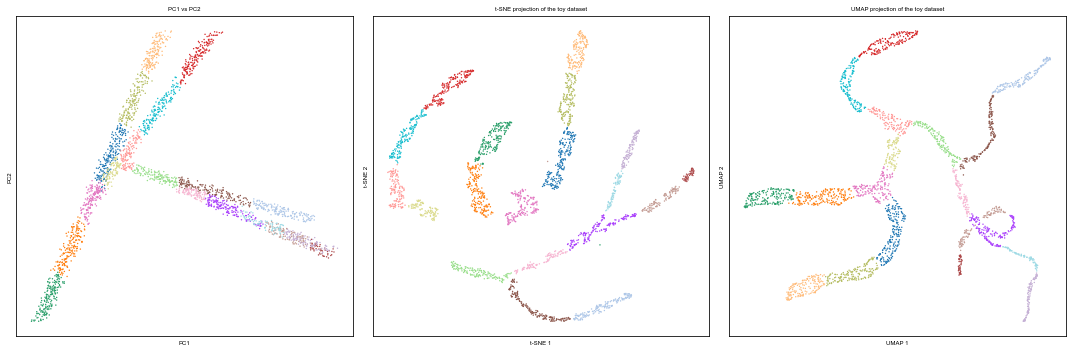

In [48]:
nbr_of_spectra = 1000   # number of spectra generated at the begining 

# gaussian functions construction
def Gauss(x, mu, sigma, intensity = 1):
    return intensity/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

# X-axis (Wavelengths)
x_range =  np.linspace(100, 500, 500)

###################################################### Component A ########################################################################################################################################################
mu_a1 = 300
sigma_a1 = 40
intensity_a1 = 1
mu_a2 = 320
sigma_a2 = 10
intensity_a2 = 0.2
gauss_a =  Gauss(x_range, mu_a1, sigma_a1, intensity_a1)+ Gauss(x_range, mu_a2, sigma_a2, intensity_a2)
###################################################### Component B ########################################################################################################################################################
mu_b = 200
sigma_b = 10
intensity_b = 1
gauss_b = Gauss(x_range, mu_b, sigma_b, intensity_b)
###################################################### Component C ########################################################################################################################################################
mu_c2 = 420
sigma_c2 = 20
intensity_c2 = 0.5
gauss_c = Gauss(x_range, mu_c2, sigma_c2, intensity_c2)
###################################################### Component D ########################################################################################################################################################
mu_d = 400
sigma_d = 5
intensity_d = 0.05
gauss_d = Gauss(x_range, mu_d, sigma_d, intensity_d)
###################################################### Component E ########################################################################################################################################################
mu_e = 399
sigma_e = 5
intensity_e =1
mu_e2 = 400
sigma_e2 = 5
intensity_e2 = 1
gauss_e = Gauss(x_range, mu_e, sigma_e, intensity_e)+ (-Gauss(x_range, mu_e2, sigma_e2, intensity_e2)*1)
###################################################### Component F ########################################################################################################################################################
mu_f = 130
sigma_f = 6
intensity_f =1
gauss_f = Gauss(x_range, mu_f, sigma_f, intensity_f)
####################################################### gaussian normalization ######################################################
component_a = gauss_a/np.max(gauss_a)
component_b = gauss_b/np.max(gauss_b)
component_c = gauss_c/np.max(gauss_c)
component_d = gauss_d/np.max(gauss_d)
component_e = gauss_e/np.max(gauss_e)
component_f = gauss_f/np.max(gauss_f)

# gaussian functions normalization    
def normalize(values, actual_bounds, desired_bounds):
    return [desired_bounds[0] + (x - actual_bounds[0]) * (desired_bounds[1] - desired_bounds[0]) / (actual_bounds[1] - actual_bounds[0]) for x in values]

# 1st gaussian component 

c_a = np.zeros(nbr_of_spectra)
component_A=[]
coef_a = []
for i in range(nbr_of_spectra): 
    c_a[i]= uniform(0,1)
    component_A.append(c_a[i]* component_a)
    coef_a.append(c_a[i])
    
coef_a = np.reshape(np.array(coef_a), (len(coef_a),1))
gaussian_A = np.concatenate([coef_a,np.array(component_A)], axis=1)

# 2nd gaussian component

gaussian_A_treshold = gaussian_A[np.where(gaussian_A[:,275] > 0.4)]
gaussian_A_treshold_ = gaussian_A_treshold[:,0]
select_norm_A = np.reshape(gaussian_A_treshold_,(len(gaussian_A_treshold_),1))
lower = min(select_norm_A)
upper = max(select_norm_A)
norm = normalize(select_norm_A, (lower,upper),(0,0.8))
component_B = (norm * component_b) + gaussian_A_treshold[:,1:501]
gaussian_B = np.concatenate([select_norm_A,component_B], axis = 1)

# 3rd gaussian component

gaussian_B_treshold = gaussian_B[np.where(gaussian_B[:,125] > 0.2)]
gaussian_B_treshold_ = gaussian_B_treshold[:,0]
select_norm_B = np.reshape(gaussian_B_treshold_,(len(gaussian_B_treshold_),1))
lower = min(select_norm_B)
upper = max(select_norm_B)
norm = normalize(select_norm_B, (lower,upper),(0,0.8))
component_C = (norm * component_c) + gaussian_B_treshold[:,1:501]
gaussian_C = np.concatenate([select_norm_B,component_C], axis = 1)

# 4th gaussian component

gaussian_C_treshold = gaussian_C[np.where(gaussian_C[:,125] > 0.3)]
gaussian_C_treshold_ = gaussian_C_treshold[:,0]
select_norm_C = np.reshape(gaussian_C_treshold_,(len(gaussian_C_treshold_),1))
lower = min(select_norm_C)
upper = max(select_norm_C)
norm = normalize(select_norm_C, (lower,upper),(0,0.5))
component_D = (norm * component_d) + gaussian_C_treshold[:,1:501]
gaussian_D = np.concatenate([select_norm_C,component_D], axis = 1)

# 4th gaussian component

gaussian_D_treshold = gaussian_D[np.where(gaussian_D[:,125] > 0.4)]
gaussian_D_treshold_ = gaussian_D_treshold[:,0]
select_norm_D = np.reshape(gaussian_D_treshold_,(len(gaussian_D_treshold_),1))
lower = min(select_norm_D)
upper = max(select_norm_D)
norm = normalize(select_norm_D, (lower,upper),(0,0.30))
component_E = (norm * component_e) + gaussian_D_treshold[:,1:501]
gaussian_E = np.concatenate([select_norm_D,component_E], axis = 1)

DATA_no_noise = np.concatenate([gaussian_A[:,1:],gaussian_B[:,1:], gaussian_C[:,1:], gaussian_D[:,1:],gaussian_E[:,1:]], axis = 0)

# 5th gaussian component

DATA_noise_1 = DATA_no_noise + (component_f*np.random.random(size=(DATA_no_noise.shape[0],1))*0.1)

#DATA_augmentation 

beta = np.random.random(size=(DATA_noise_1.shape[0],1))*0.03
slope = np.random.random(size=(DATA_noise_1.shape[0],1))*0.03
a = np.array(range(DATA_noise_1.shape[1]))/float(DATA_noise_1.shape[1])
offset = slope*(a) + beta

noise1 = np.random.normal(0, 0.0055, [np.shape(DATA_noise_1)[0],np.shape(DATA_noise_1)[1]])* np.exp(3*np.cos(x_range/(30*np.pi)))
noise2 = np.random.normal(0.0, 0.015, [np.shape(DATA_noise_1)[0],np.shape(DATA_noise_1)[1]])
noise3 = np.random.normal(0, 0.0015, [np.shape(DATA_noise_1)[0],np.shape(DATA_noise_1)[1]])* np.exp(3*np.cos(x_range/(100*np.pi)))

DATA_noise_2 = DATA_noise_1 + offset + noise1  + noise3 + noise2

Toy_Dataset = pd.DataFrame(DATA_noise_2.T,x_range.round(decimals=1))
Toy_Dataset = Toy_Dataset.T
Toy_Dataset = Toy_Dataset.add_suffix (' cm-1')
Toy_Dataset = Toy_Dataset.set_index('SP' + Toy_Dataset.index.astype(str))
freq = pd.DataFrame(Toy_Dataset.columns.values , columns = ['gene_ids'], index = Toy_Dataset.columns.values)

DATA_arti_without_noize = pd.DataFrame(DATA_no_noise.T,x_range.round(decimals=1))
DATA_arti_without_noize = DATA_arti_without_noize.T
DATA_arti_without_noize = DATA_arti_without_noize.add_suffix (' cm-1')
DATA_arti_without_noize = DATA_arti_without_noize.set_index('SP' + Toy_Dataset.index.astype(str))

# Data_exportation
Toy_Dataset.to_pickle("./Toy_Dataset_25_05_2021_12h.pkl")

adata = ad.AnnData(Toy_Dataset, var=freq)
sc.pp.pca(adata, n_comps=5, svd_solver='arpack')
sc.pp.neighbors(adata, n_pcs=5,  n_neighbors= 25, metric ='euclidean')
sc.tl.leiden(adata, resolution = 0.5)
sc.tl.tsne(adata)
sc.tl.umap(adata)

plt.figure(figsize=(15, 5))
fontsize = 6

ax1 = plt.subplot2grid((1,3),(0,0))
ax1 = sc.pl.pca(adata, color='leiden', size = 8,show = False,  frameon = True, ax = ax1)
ax1.tick_params(labelsize=6)
ax1.set_xlabel('PC1', fontsize = fontsize)
ax1.set_ylabel('PC2', fontsize = fontsize)
ax1.set_title('PC1 vs PC2',fontsize=fontsize)
ax1.get_legend().remove()

ax2 = plt.subplot2grid((1,3),(0,1))
ax2 = sc.pl.tsne(adata, color='leiden', size = 8, show = False,  frameon = True, ax = ax2)
ax2.tick_params(labelsize=6)
ax2.set_xlabel('t-SNE 1', fontsize = fontsize)
ax2.set_ylabel('t-SNE 2', fontsize = fontsize)
ax2.set_title('t-SNE projection of the toy dataset',fontsize=fontsize)
ax2.get_legend().remove()


ax3 = plt.subplot2grid((1,3),(0,2))
ax3 = sc.pl.umap(adata, color='leiden', size = 8, show = False,  frameon = True, ax = ax3)
ax3.tick_params(labelsize=6)
ax3.set_xlabel('UMAP 1', fontsize = fontsize)
ax3.set_ylabel('UMAP 2', fontsize = fontsize)
ax3.set_title('UMAP projection of the toy dataset',fontsize=fontsize)
ax3.get_legend().remove()

plt.tight_layout()

# DATA PLOTING 

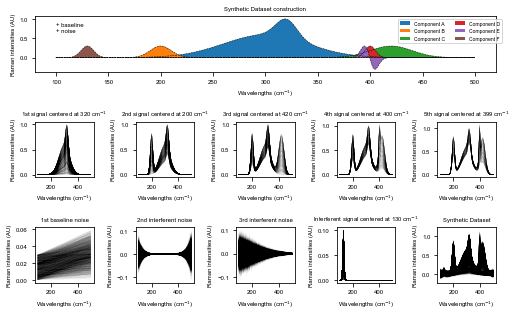

In [18]:
plt.figure(figsize=(7.25, 4.5))
fontsize = 6
rcParams['font.sans-serif'] = ['Arial']
#matplotlib.rcParams['figure.autolayout'] = True
ax1 = plt.subplot2grid((3,5),(0,0), colspan=5)
plt.plot(x_range,component_a,'k--',linewidth = 0.5)
plt.fill(x_range,component_a,label='Component A')
plt.plot(x_range,component_b*0.3,'k--',linewidth = 0.5)
plt.fill(x_range,component_b*0.3,label='Component B')
plt.plot(x_range,component_c*0.3,'k--',linewidth = 0.5)
plt.fill(x_range,component_c*0.3,label='Component C')
plt.plot(x_range,component_d*0.3,'k--',linewidth = 0.5)
plt.fill(x_range,component_d*0.3,label='Component D')
plt.plot(x_range,component_e*0.3,'k--',linewidth = 0.5)
plt.fill(x_range,component_e*0.3,label='Component E')
plt.plot(x_range,component_f*0.3,'k--',linewidth = 0.5)
plt.fill(x_range,component_f*0.3,label='Component F')
ax1.legend(loc='upper center', bbox_to_anchor=(0.90, 1), shadow=False, ncol=2, fontsize=5)
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
ax1.tick_params(labelsize=6)
ax1.text(100, 0.8, r'+ baseline', fontsize=fontsize)
ax1.text(100, 0.65, r'+ noise', fontsize=fontsize)
ax1.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax1.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax1.set_title('Synthetic Dataset construction',fontsize=fontsize)

ax2 = plt.subplot2grid((3,5),(1,0))
ax2.plot(x_range,gaussian_A[:,1:501].T, 'black', linewidth=0.011)
ax2.xaxis.grid(False)
ax2.yaxis.grid(False)
ax2.tick_params(labelsize=6)
ax2.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax2.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax2.set_title('1st signal centered at 320 cm$^{-1}$',fontsize=fontsize)

ax3 = plt.subplot2grid((3,5),(1,1))
ax3.plot(x_range,gaussian_B[:,1:501].T, 'black', linewidth=0.011)
ax3.xaxis.grid(False)
ax3.yaxis.grid(False)
ax3.tick_params(labelsize=6)
ax3.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax3.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax3.set_title('2nd signal centered at 200 cm$^{-1}$',fontsize=fontsize)

ax4 = plt.subplot2grid((3,5),(1,2))
ax4.plot(x_range,gaussian_C[:,1:501].T, 'black', linewidth=0.011)
ax4.xaxis.grid(False)
ax4.yaxis.grid(False)
ax4.tick_params(labelsize=6)
ax4.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax4.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax4.set_title('3rd signal centered at 420 cm$^{-1}$',fontsize=fontsize)

ax5 = plt.subplot2grid((3,5),(1,3))
ax5.plot(x_range,gaussian_D[:,1:501].T, 'black', linewidth=0.011)
ax5.xaxis.grid(False)
ax5.yaxis.grid(False)
ax5.tick_params(labelsize=6)
ax5.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax5.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax5.set_title('4th signal centered at 400 cm$^{-1}$',fontsize=fontsize)

ax6 = plt.subplot2grid((3,5),(1,4))
ax6.plot(x_range,gaussian_E[:,1:501].T, 'black', linewidth=0.011)
ax6.xaxis.grid(False)
ax6.yaxis.grid(False)
ax6.tick_params(labelsize=6)
ax6.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax6.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax6.set_title('5th signal centered at 399 cm$^{-1}$',fontsize=fontsize)

ax7 = plt.subplot2grid((3,5),(2,0))
ax7.plot(x_range,offset.T, 'black', linewidth=0.011)
ax7.xaxis.grid(False)
ax7.yaxis.grid(False)
ax7.tick_params(labelsize=6)
ax7.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax7.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax7.set_title(' 1st baseline noise',fontsize=fontsize)

ax8 = plt.subplot2grid((3,5),(2,1))
ax8.plot(x_range,noise1.T, 'black', linewidth=0.011)
ax8.xaxis.grid(False)
ax8.yaxis.grid(False)
ax8.tick_params(labelsize=6)
ax8.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax8.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax8.set_title('2nd interferent noise',fontsize=fontsize)

ax9 = plt.subplot2grid((3,5),(2,2))
ax9.plot(x_range,noise3.T, 'black', linewidth=0.011)
ax9.xaxis.grid(False)
ax9.yaxis.grid(False)
ax9.tick_params(labelsize=6)
ax9.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax9.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax9.set_title('3rd interferent noise',fontsize=fontsize)

ax10 = plt.subplot2grid((3,5),(2,3))
ax10.plot(x_range,(component_f*np.random.random(size=(DATA_no_noise.shape[0],1))*0.1).T, 'black', linewidth=0.011)
ax10.xaxis.grid(False)
ax10.yaxis.grid(False)
ax10.tick_params(labelsize=6)
ax10.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax10.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax10.set_title('Interferent signal centered at 130 cm$^{-1}$',fontsize=fontsize)

ax11 = plt.subplot2grid((3,5),(2,4))
ax11.plot(x_range,Toy_Dataset.T.values, 'black', linewidth=0.011)
ax11.xaxis.grid(False)
ax11.yaxis.grid(False)
ax11.tick_params(labelsize=6)
ax11.set_xlabel("Wavelengths (cm$^{-1}$)",fontsize=fontsize)
ax11.set_ylabel("Raman intensities (AU)",fontsize=fontsize)
ax11.set_title('Synthetic Dataset',fontsize=fontsize)

plt.tight_layout()
#plt.savefig(r'C:\Users\Cosmic\Desktop\Figures\synthetic_dataset.svg', dpi=600, format='svg')